<a href="https://colab.research.google.com/github/ogiogidayo/EXB3-B/blob/main/qlab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit_aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 785.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=4e81ecc1d95d8e829764d9aff1fa71e5e8f590f9dcf864ff7bf02889b199494a
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from sympy.physics.quantum.qubit import matrix_to_qubit

simulator = AerSimulator()

def get_statevector(circuit):
    circuit = circuit.copy()
    circuit=circuit.reverse_bits()
    circuit.save_statevector()
    circuit = transpile(circuit, backend=simulator)
    job = simulator.run(circuit)
    result = job.result()
    qiskit_statevector = result.data()['statevector']
    return np.asarray(qiskit_statevector) .reshape(-1,1)

def count_shots(circuit, shots):
    circuit = circuit.copy()
    circuit=circuit.reverse_bits()
    circuit = transpile(circuit, backend=simulator)
    return simulator.run(circuit, shots=shots).result().get_counts()

toffoli 前の状態は


0.5*|000> + 0.5*|010> + 0.5*|100> + 0.5*|110>

toffoli 後の状態は


0.5*|000> + 0.5*|010> + 0.5*|100> + 0.5*|111>

reg2 の測定後の状態は


0.577350269189626*|000> + 0.577350269189626*|010> + 0.577350269189626*|100>

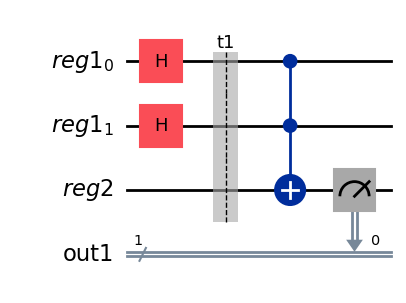

In [5]:
register1 = QuantumRegister(2, name='reg1') #量子レジスタ1 (2qubit)
register2 = QuantumRegister(1, name='reg2') #量子レジスタ2 (1qubit)
output1 = ClassicalRegister(1, name='out1') #古典レジスタ  (1bit)

circuit = QuantumCircuit(register1, register2, output1) #レジスタを合わせて回路に

circuit.h(register1) #アダマールgeta、ここで均等な重ね合わせ状態が作られる。
#circuit.h(register1[0]) と circuit.h(register1[1]) に分けてもよい。
print("toffoli 前の状態は") #↓状態の表示
display(matrix_to_qubit( get_statevector(circuit) ))

circuit.barrier(label="t1") #見やすくするための区切り線

circuit.mcx([register1[0],register1[1]],register2[0]) #Toffoli gate
print("toffoli 後の状態は") #↓状態の表示
display(matrix_to_qubit( get_statevector(circuit) ))

circuit.measure(register2, output1) #測定
print("reg2 の測定後の状態は") #↓状態の表示
display(matrix_to_qubit( get_statevector(circuit) ))

circuit.draw('mpl') #回路図の描画

In [6]:
counts=count_shots(circuit,1000) #1000 回測定してカウント
display(counts) #count[‘0’] や count[‘1’] で要素が取り出せる、辞書形式。

{'0': 740, '1': 260}

アダマールゲート適用後の状態は


0.125*|000000> + 0.125*|000001> + 0.125*|000010> + 0.125*|000011> + 0.125*|000100> + 0.125*|000101> + 0.125*|000110> + 0.125*|000111> + 0.125*|001000> + 0.125*|001001> + 0.125*|001010> + 0.125*|001011> + 0.125*|001100> + 0.125*|001101> + 0.125*|001110> + 0.125*|001111> + 0.125*|010000> + 0.125*|010001> + 0.125*|010010> + 0.125*|010011> + 0.125*|010100> + 0.125*|010101> + 0.125*|010110> + 0.125*|010111> + 0.125*|011000> + 0.125*|011001> + 0.125*|011010> + 0.125*|011011> + 0.125*|011100> + 0.125*|011101> + 0.125*|011110> + 0.125*|011111> + 0.125*|100000> + 0.125*|100001> + 0.125*|100010> + 0.125*|100011> + 0.125*|100100> + 0.125*|100101> + 0.125*|100110> + 0.125*|100111> + 0.125*|101000> + 0.125*|101001> + 0.125*|101010> + 0.125*|101011> + 0.125*|101100> + 0.125*|101101> + 0.125*|101110> + 0.125*|101111> + 0.125*|110000> + 0.125*|110001> + 0.125*|110010> + 0.125*|110011> + 0.125*|110100> + 0.125*|110101> + 0.125*|110110> + 0.125*|110111> + 0.125*|111000> + 0.125*|111001> + 0.125*|111010>

測定後の状態は


1.0*|001111>

測定結果:


{'110100': 167,
 '101111': 148,
 '101001': 157,
 '100101': 151,
 '001111': 153,
 '101010': 142,
 '101100': 165,
 '010110': 149,
 '111101': 161,
 '001100': 166,
 '001000': 154,
 '011111': 153,
 '011011': 158,
 '001101': 150,
 '010000': 151,
 '000111': 155,
 '000101': 169,
 '110011': 141,
 '010111': 162,
 '010100': 175,
 '111111': 153,
 '111110': 141,
 '100001': 158,
 '010101': 168,
 '000000': 161,
 '011110': 162,
 '100110': 164,
 '100000': 165,
 '000011': 134,
 '110001': 177,
 '111010': 142,
 '101110': 167,
 '111001': 162,
 '001010': 139,
 '100111': 162,
 '000100': 176,
 '100010': 154,
 '111000': 162,
 '000010': 156,
 '110101': 155,
 '110000': 159,
 '111100': 147,
 '001001': 130,
 '010011': 140,
 '010010': 146,
 '111011': 166,
 '011000': 156,
 '001011': 146,
 '101101': 173,
 '001110': 170,
 '110110': 151,
 '100011': 149,
 '010001': 156,
 '000110': 156,
 '101011': 143,
 '011100': 176,
 '110010': 145,
 '011001': 154,
 '101000': 170,
 '011101': 157,
 '000001': 142,
 '011010': 178,
 '100100

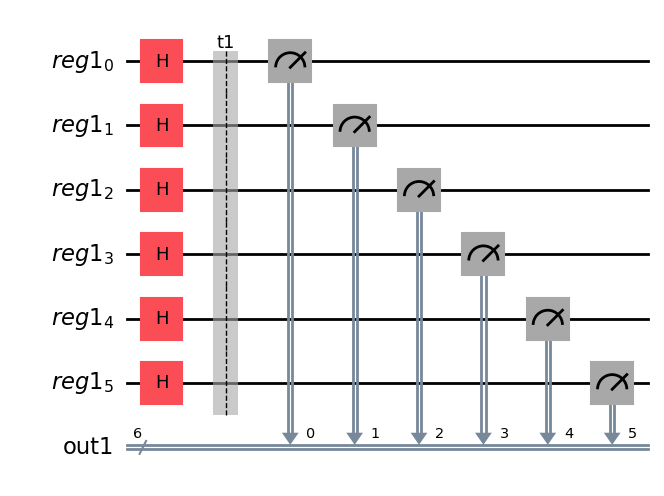

In [13]:
# 量子レジスタと古典レジスタの作成
register1 = QuantumRegister(6, name='reg1')
output1 = ClassicalRegister(6, name='out1')

# 量子回路の作成
circuit = QuantumCircuit(register1, output1)

# アダマールゲートを適用して均等な重ね合わせ状態を作成
circuit.h(register1)
print("アダマールゲート適用後の状態は")
display(matrix_to_qubit(get_statevector(circuit)))

# 見やすくするための区切り線
circuit.barrier(label="t1")

# 測定
circuit.measure(register1, output1)
print("測定後の状態は")
display(matrix_to_qubit(get_statevector(circuit)))

# シミュレーションの実行と測定結果をカウント
counts = count_shots(circuit, 10000)
print("測定結果:")
display(counts)

# 回路図の描画
circuit.draw('mpl')

初期状態は


0.5*|000> + 0.5*|010> + 0.5*|100> + 0.5*|110>

OR 演算後の状態は


0.5*|000> + 0.5*|011> + 0.5*|101> + 0.5*|111>

測定後の状態は


0.577350269189626*|011> + 0.577350269189626*|101> + 0.577350269189626*|111>

測定結果:


{'0': 258, '1': 742}

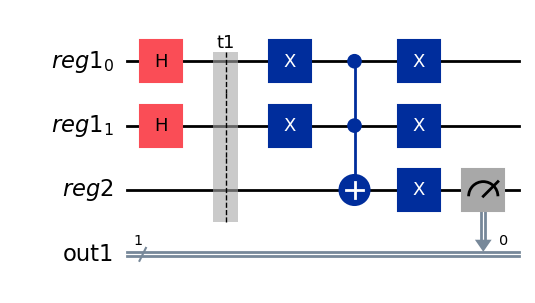

In [17]:
# kadai3b
# 量子レジスタと古典レジスタの作成
register1 = QuantumRegister(2, name='reg1')
register2 = QuantumRegister(1, name='reg2')
output1 = ClassicalRegister(1, name='out1')

# 量子回路の作成
circuit = QuantumCircuit(register1, register2, output1)

# アダマールゲートを適用して均等な重ね合わせ状態を作成
circuit.h(register1)
print("初期状態は")
display(matrix_to_qubit(get_statevector(circuit)))

# 見やすくするための区切り線
circuit.barrier(label="t1")

# ド・モルガンの法則に基づく OR 演算
circuit.x(register1)  # NOT A と NOT B を作る
circuit.mcx([register1[0], register1[1]], register2[0])  # AND 演算
circuit.x(register2[0])  # NOT (A AND B)
circuit.x(register1)  # 元に戻す

print("OR 演算後の状態は")
display(matrix_to_qubit(get_statevector(circuit)))

# 測定
circuit.measure(register2, output1)
print("測定後の状態は")
display(matrix_to_qubit(get_statevector(circuit)))

# シミュレーションの実行と測定結果をカウント
counts = count_shots(circuit, 1000)
print("測定結果:")
display(counts)

# 回路図の描画
circuit.draw('mpl')